# K-Vecinos Más Cercanos (KNN)

Texto extraído de `ChatGPT`:

El **algoritmo de k vecinos más cercanos (k-NN, por sus siglas en inglés)** es un algoritmo de **aprendizaje supervisado** utilizado tanto para **clasificación** como para **regresión**. Es uno de los algoritmos más simples y fáciles de entender en el campo del aprendizaje automático. La idea básica detrás del algoritmo es que un dato se clasifica o se predice en función de los "k" ejemplos más cercanos en el espacio de características.

## ¿Cómo funciona el algoritmo de k-NN?

1. **Definir el número de vecinos (k)**: Se selecciona el valor de "k", que indica cuántos vecinos más cercanos se considerarán para hacer la predicción. "k" debe ser un número entero positivo.
   
2. **Calcular la distancia entre los puntos**: Se mide la **distancia** entre el nuevo punto de datos y todos los puntos de datos en el conjunto de entrenamiento. Las distancias más comunes son:
   - **Distancia Euclidiana**: La más utilizada, especialmente en problemas de clasificación y regresión.
   - **Distancia de Manhattan**: Suma de las diferencias absolutas entre las coordenadas.
   - **Distancia de Minkowski**: Generalización de la distancia Euclidiana y Manhattan.

3. **Identificar los k vecinos más cercanos**: Una vez que se han calculado las distancias, se seleccionan los "k" puntos de datos más cercanos al nuevo punto que se desea clasificar o predecir.

4. **Clasificación o Predicción**:
   - **Clasificación**: Para un problema de clasificación, se asigna la etiqueta de clase más frecuente entre los k vecinos más cercanos. En caso de empate, se puede usar un criterio adicional, como la clase de menor distancia media.
   - **Regresión**: Para un problema de regresión, la predicción será el valor promedio de las etiquetas de los k vecinos más cercanos.

## Ejemplo de clasificación con k-NN:
Imagina que tienes un conjunto de datos con dos características (por ejemplo, altura y peso) y clases de frutas (manzana y naranja). Si deseas clasificar un nuevo punto (por ejemplo, con altura 160 cm y peso 80 kg), el algoritmo de k-NN calculará la distancia entre este punto y todos los puntos en el conjunto de entrenamiento, seleccionará los k vecinos más cercanos (por ejemplo, k=3) y asignará la clase mayoritaria entre esos tres vecinos (por ejemplo, 2 manzanas y 1 naranja, por lo que clasificaría la fruta como manzana).

## Características principales del algoritmo k-NN:

- **No paramétrico**: No realiza suposiciones sobre la distribución de los datos. Es decir, no requiere un modelo previo.
- **Instancia basada**: Al ser un algoritmo basado en instancias, no construye un modelo explícito, sino que guarda todos los datos de entrenamiento.
- **Curse of Dimensionality (Maleficio de la Dimensionalidad)**: El rendimiento de k-NN puede verse afectado negativamente cuando los datos tienen muchas características (dimensiones). A medida que la cantidad de dimensiones aumenta, las distancias entre los puntos se vuelven más similares, lo que hace que el algoritmo sea menos efectivo.

## Ventajas del algoritmo k-NN:
1. **Simplicidad**: Es fácil de entender e implementar.
2. **Eficiencia en entrenamiento**: No requiere un proceso de entrenamiento real, ya que el modelo simplemente memoriza el conjunto de entrenamiento.
3. **Adaptabilidad**: Se adapta bien a cambios en los datos, ya que no necesita un proceso de ajuste o entrenamiento largo.

## Desventajas del algoritmo k-NN:
1. **Computacionalmente costoso**: Durante la predicción, el algoritmo debe calcular la distancia de cada punto de prueba con todos los puntos de entrenamiento, lo cual puede ser muy lento en conjuntos de datos grandes.
2. **Dependencia de la elección de k**: La precisión del algoritmo depende mucho de la elección del valor de "k". Si "k" es demasiado pequeño, el modelo puede ser sensible a ruido (overfitting), y si es demasiado grande, puede ser demasiado general (underfitting).
3. **Sensibilidad a la escala de las características**: Si las características tienen diferentes escalas (por ejemplo, altura en cm y peso en kg), la distancia entre los puntos puede no ser significativa. En este caso, es recomendable normalizar o estandarizar las características.

## Elección del parámetro "k":

- Si "k" es pequeño (por ejemplo, 1), el modelo será muy sensible a puntos atípicos (overfitting).
- Si "k" es grande, el modelo se vuelve más general y puede ignorar detalles importantes (underfitting).
- En la práctica, se elige "k" mediante validación cruzada, probando varios valores y seleccionando el que ofrezca mejor rendimiento.

## Conclusión:

El algoritmo **k-NN** es una herramienta simple pero poderosa para tareas de clasificación y regresión. Aunque puede no ser el más eficiente para grandes volúmenes de datos o alta dimensionalidad, sigue siendo muy popular debido a su facilidad de implementación y su rendimiento en muchos problemas.


## Ejemplo en Python

### Datos de clientes bancarios: crédito

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
clientes = pd.read_csv("../datos/creditos.csv")
clientes.head() # cumplio (con pago del credito) -> 0: no, 1: sí

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


### Pagadores VS Deudores

In [3]:
buenos = clientes[clientes["cumplio"] == 1]
malos = clientes[clientes["cumplio"] == 0]
buenos.shape, malos.shape

((167, 3), (33, 3))

### Gráfica: Pagadores VS Deudores

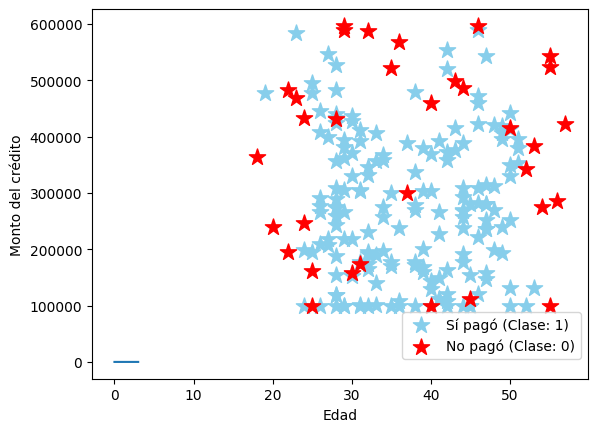

In [4]:
plt.scatter(buenos["edad"], buenos["credito"], 
            marker="*", 
            s=150, 
            color="skyblue", 
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"], 
            marker="*", 
            s=150, 
            color="red", 
            label="No pagó (Clase: 0)")

plt.plot([0,1,2,3],[0,1,2,3])

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

### Preparación de los datos: Escalar

Dado que el algoritmo de K-vecinos más cercanos se basa en la distancia entre los puntos, se hace necesario de alguna manera estandarizar o normalizar los valores para queexista una escala uniforme entre ellos y poder trabajar adecuadamente con el concepto de las distancias.

In [6]:
datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

### Creación del Modelo KNN

#### Valor de K

In [7]:
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

### Probar la predicción

/Users/Loli/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase [0]
Probabilidades por clase [[0.66666667 0.33333333]]


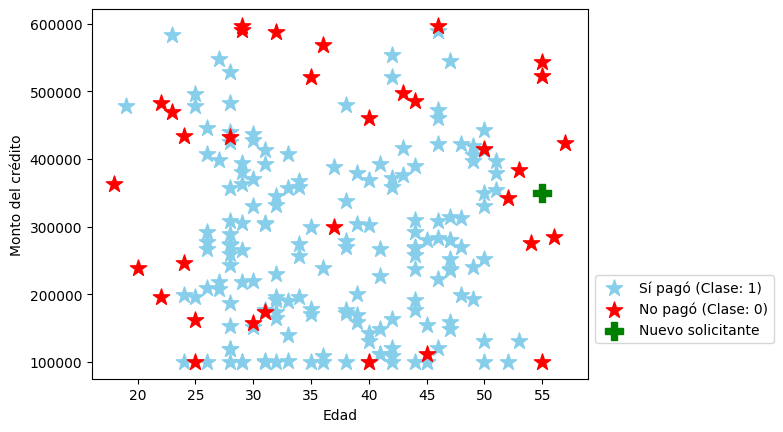

In [17]:
edad = 55
monto = 350000

# Escalar los datos del nuevo solicitante
nuevo_solicitante = escalador.transform([[edad, monto]])

# Calcular clase y probabilidades
print("Clase", clasificador.predict(nuevo_solicitante))
print("Probabilidades por clase", clasificador.predict_proba(nuevo_solicitante))

# Grafico
plt.scatter(buenos["edad"], buenos["credito"], 
            marker="*", 
            s=150, 
            color="skyblue", 
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"], 
            marker="*", 
            s=150, 
            color="red", 
            label="No pagó (Clase: 0)")

plt.scatter(edad, monto,
            marker="P",
            s=150,
            color="green",
            label="Nuevo solicitante")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

### Regiones de clases

#### Pagadores VS Deudores

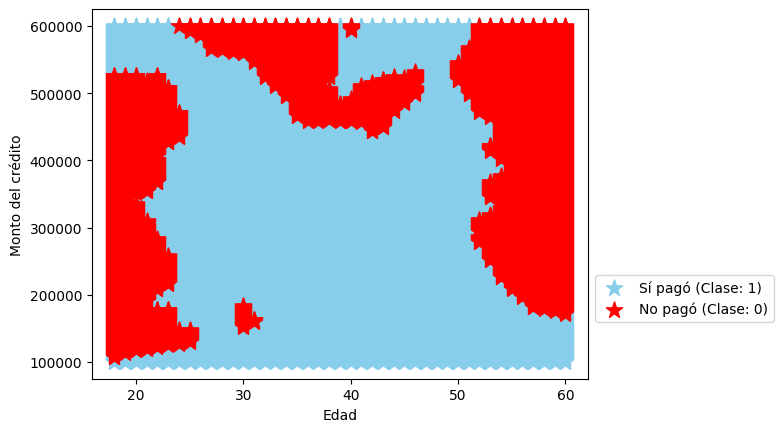

In [25]:
# Datos sinteticos de todos los posibles solicitantes
creditos = np.array([np.arange(100000, 600010, 1000)] * 43).reshape(1, -1)
#creditos.shape
edades = np.array([np.arange(18, 61)] * 501).reshape(1, -1)
#edades.shape
todos = pd.DataFrame(np.stack((edades, creditos), axis=2)[0], columns=["edad", "credito"])

# Escalar los datos
todos_escalado = escalador.transform(todos)

# Predecir todas las clases
clases_resultantes = clasificador.predict(todos_escalado)

# Grafico
buenos = todos[clases_resultantes==1]
malos = todos[clases_resultantes==0]
plt.scatter(buenos["edad"], buenos["credito"], 
            marker="*", 
            s=150, 
            color="skyblue", 
            label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"], 
            marker="*", 
            s=150, 
            color="red", 
            label="No pagó (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

### Prueba personal tuneando hiperparámetros

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
clasificador.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [29]:
np.array(np.arange(3, np.sqrt(clientes.shape[0]))).tolist()

14.142135623730951

In [31]:
parametros = {
    "n_neighbors": np.arange(3, int(np.sqrt(clientes.shape[0]))).tolist(),
    "metric": ["minkowski", "euclidean", "manhattan"]
}

rejilla = GridSearchCV(
    KNeighborsClassifier(),
    parametros,
    scoring="accuracy"
)

rejilla.fit(clientes[["edad", "credito"]], clientes["cumplio"])

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
             scoring='accuracy')

In [32]:
rejilla.cv_results_["params"]

[{'metric': 'minkowski', 'n_neighbors': 3},
 {'metric': 'minkowski', 'n_neighbors': 4},
 {'metric': 'minkowski', 'n_neighbors': 5},
 {'metric': 'minkowski', 'n_neighbors': 6},
 {'metric': 'minkowski', 'n_neighbors': 7},
 {'metric': 'minkowski', 'n_neighbors': 8},
 {'metric': 'minkowski', 'n_neighbors': 9},
 {'metric': 'minkowski', 'n_neighbors': 10},
 {'metric': 'minkowski', 'n_neighbors': 11},
 {'metric': 'minkowski', 'n_neighbors': 12},
 {'metric': 'minkowski', 'n_neighbors': 13},
 {'metric': 'euclidean', 'n_neighbors': 3},
 {'metric': 'euclidean', 'n_neighbors': 4},
 {'metric': 'euclidean', 'n_neighbors': 5},
 {'metric': 'euclidean', 'n_neighbors': 6},
 {'metric': 'euclidean', 'n_neighbors': 7},
 {'metric': 'euclidean', 'n_neighbors': 8},
 {'metric': 'euclidean', 'n_neighbors': 9},
 {'metric': 'euclidean', 'n_neighbors': 10},
 {'metric': 'euclidean', 'n_neighbors': 11},
 {'metric': 'euclidean', 'n_neighbors': 12},
 {'metric': 'euclidean', 'n_neighbors': 13},
 {'metric': 'manhattan',

In [33]:
print(rejilla.cv_results_["rank_test_score"])
print(rejilla.cv_results_["mean_test_score"])
print(rejilla.best_score_)
print(rejilla.best_params_)

[25 31  1  4 13 25 13 22  7 13  7 25 31  1  4 13 25 13 22  7 13  7 25 31
  1  4 13 25 13 22  7 13  7]
[0.8   0.795 0.835 0.83  0.82  0.8   0.82  0.815 0.825 0.82  0.825 0.8
 0.795 0.835 0.83  0.82  0.8   0.82  0.815 0.825 0.82  0.825 0.8   0.795
 0.835 0.83  0.82  0.8   0.82  0.815 0.825 0.82  0.825]
0.835
{'metric': 'minkowski', 'n_neighbors': 5}


In [37]:
mejor_k_vecinos = rejilla.best_estimator_
print(edad, monto)
print(mejor_k_vecinos.predict(nuevo_solicitante))

55 350000
[1]


/Users/Loli/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [39]:
mejor_k_vecinos.n_neighbors, mejor_k_vecinos.metric

(5, 'minkowski')